In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
preg_raw = pd.read_csv("2002FemPregOut.csv")
preg_raw = preg_raw.dropna()
preg_raw.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglngth,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


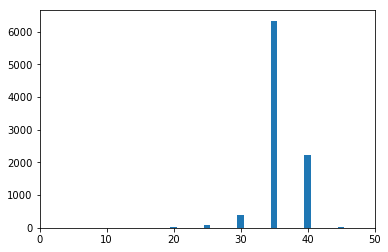

In [7]:
# PMF to plot first
hist_vals, bin_edges = np.histogram(preg_raw['prglngth'])
plt.bar(bin_edges[:-1], hist_vals, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show() 

In [18]:
# CDF
## Method 1 - you get each value's percentile, but still later divide into bins then plot
def get_lst_percentile(lst):
    result = []
    for elem in lst:
        result.append(round(stats.percentileofscore(lst, elem))/100.0)
    return result

preg_raw['prglngth_percentile'] = preg_raw['prglngth'].transform(get_lst_percentile)
preg_raw['prglngth_percentile'][4:10]

4    0.50
5    0.21
6    0.81
7    0.96
8    0.50
9    0.07
Name: prglngth_percentile, dtype: float64

In [24]:
hist_vals, bin_edges = np.histogram(preg_raw['prglngth_percentile'])
print(hist_vals)
print(bin_edges)

[ 818  770  603    0    0 4655    0    0 1111 1130]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


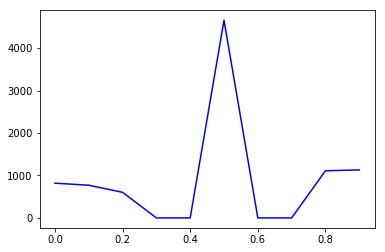

In [26]:
plt.plot(bin_edges[:-1], hist_vals, c='blue')
plt.show()

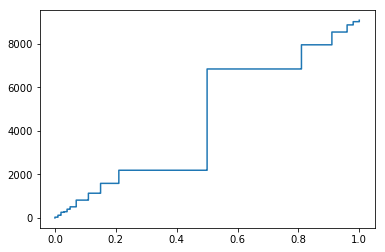

In [30]:
# CDF
# Method 2 - no need bins, plot the percentile and count in each percentile
sorted_data = np.sort(preg_raw['prglngth_percentile'])
plt.step(sorted_data, np.arange(sorted_data.size)) 
plt.show()